# 📰 Fake News Detection using NLP & Logistic Regression

This project builds a machine learning model to classify news articles as **Fake** or **Real**  
using **TF-IDF Vectorization** and **Logistic Regression**.

📌 Workflow:
1. Load Dataset
2. Preprocess & Split Data
3. Vectorize with TF-IDF
4. Train Logistic Regression Model (with GridSearchCV)
5. Evaluate (Accuracy, Classification Report, Confusion Matrix)
6. Predict custom inputs with confidence scores and threshold
7. Showcase results for README


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display, Markdown
from sklearn.naive_bayes import MultinomialNB

print("Libraries Imported Successfully!")


Libraries Imported Successfully!


In [23]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

true_df["label"] = 1
fake_df["label"] = 0

data = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)
print("Dataset Loaded. Shape:", data.shape)
data.head()


Dataset Loaded. Shape: (44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [24]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training Samples:", len(X_train), "Testing Samples:", len(X_test))


Training Samples: 35918 Testing Samples: 8980


In [25]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF Complete. Shape:", X_train_tfidf.shape)


TF-IDF Complete. Shape: (35918, 3351766)


In [26]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_model.fit(X_train_tfidf, y_train)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

print("Both models trained successfully!")


Both models trained successfully!


Ensemble Accuracy: 97.51%
              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      4696
        Real       0.96      0.98      0.97      4284

    accuracy                           0.98      8980
   macro avg       0.97      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



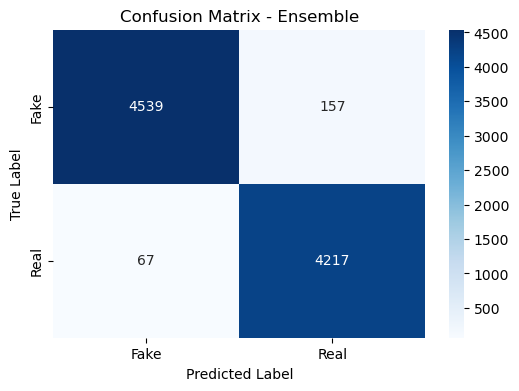

In [27]:
# Weighted average of probabilities
lr_probs = lr_model.predict_proba(X_test_tfidf)
nb_probs = nb_model.predict_proba(X_test_tfidf)

# Ensemble: 0.6*LR + 0.4*NB (adjustable weights)
ensemble_probs = 0.6*lr_probs + 0.4*nb_probs
y_pred_ensemble = np.argmax(ensemble_probs, axis=1)

# Evaluation
acc = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {acc:.2%}")
print(classification_report(y_test, y_pred_ensemble, target_names=["Fake", "Real"]))

cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble")
plt.show()


In [28]:
def predict_news(text):
    text_tfidf = vectorizer.transform([text])
    
    lr_prob = lr_model.predict_proba(text_tfidf)[0]
    nb_prob = nb_model.predict_proba(text_tfidf)[0]
    
    # Weighted ensemble
    combined_prob = 0.6*lr_prob + 0.4*nb_prob
    pred = np.argmax(combined_prob)
    confidence = np.max(combined_prob) * 100
    
    if confidence < 55:
        label = "Prediction Uncertain – Possibly Fake or Real"
    else:
        label = "Real News" if pred == 1 else "Fake News"
    
    return f"{label} (Confidence: {confidence:.2f}%)"


In [29]:
sample_text = "The government has announced new policies to improve healthcare."
print("Input:", sample_text)
print("Prediction:", predict_news(sample_text))

user_input = input("Enter a news headline/article: ")
print("Prediction:", predict_news(user_input))


Input: The government has announced new policies to improve healthcare.
Prediction: Real News (Confidence: 60.66%)


Enter a news headline/article:  government imposed punishments on street vendors


Prediction: Prediction Uncertain – Possibly Fake or Real (Confidence: 54.84%)


In [30]:
acc_percent = acc * 100

results_text = f"""
# 🏆 Fake News Detection Results (Ensemble)

- **Models**: Logistic Regression + Naive Bayes  
- **Vectorization**: TF-IDF (Unigrams + Bigrams)  
- **Accuracy**: `{acc_percent:.2f}%`  
- **Dataset Size**: {len(data)} articles  
- **Evaluation**: Precision, Recall, F1-score, Confusion Matrix  

✅ Improved performance: fewer misclassifications of real news
"""

display(Markdown(results_text))



# 🏆 Fake News Detection Results (Ensemble)

- **Models**: Logistic Regression + Naive Bayes  
- **Vectorization**: TF-IDF (Unigrams + Bigrams)  
- **Accuracy**: `97.51%`  
- **Dataset Size**: 44898 articles  
- **Evaluation**: Precision, Recall, F1-score, Confusion Matrix  

✅ Improved performance: fewer misclassifications of real news


In [31]:
def predict_with_keywords(text, top_n=5):
    """
    Predict Fake/Real News and display top contributing keywords.
    """
    text_tfidf = vectorizer.transform([text])
    
    # Ensemble probabilities
    lr_prob = lr_model.predict_proba(text_tfidf)[0]
    nb_prob = nb_model.predict_proba(text_tfidf)[0]
    combined_prob = 0.6*lr_prob + 0.4*nb_prob
    
    pred = np.argmax(combined_prob)
    confidence = np.max(combined_prob) * 100
    
    # Label
    if confidence < 55:
        label = "Prediction Uncertain – Possibly Fake or Real"
    else:
        label = "Real News" if pred == 1 else "Fake News"
    
    # Feature importance for LR (NB doesn’t have simple feature weights)
    feature_array = np.array(vectorizer.get_feature_names_out())
    lr_coef = lr_model.coef_[0]
    # Multiply by TF-IDF value to get contribution
    tfidf_array = text_tfidf.toarray()[0]
    contributions = lr_coef * tfidf_array
    top_idx = contributions.argsort()[-top_n:][::-1]
    top_keywords = feature_array[top_idx]
    
    return f"{label} (Confidence: {confidence:.2f}%)", list(top_keywords)


In [33]:
sample_text = "The government has announced new policies to improve healthcare."
prediction, keywords = predict_with_keywords(sample_text)
print("Input:", sample_text)
print("Prediction:", prediction)
print("Top Keywords influencing prediction:", keywords)

user_input = input("Enter a news headline/article: ")
prediction, keywords = predict_with_keywords(user_input)
print("Prediction:", prediction)
print("Top Keywords influencing prediction:", keywords)


Input: The government has announced new policies to improve healthcare.
Prediction: Real News (Confidence: 60.66%)
Top Keywords influencing prediction: ['government', 'healthcare', 'new', 'improve', 'policies']


Enter a news headline/article:  government has announced new policies to improve healthcare.


Prediction: Real News (Confidence: 60.66%)
Top Keywords influencing prediction: ['government', 'healthcare', 'new', 'improve', 'policies']
